In [280]:
#Importing necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords

In [2]:
#Setting new working directory

%cd C:\Users\Akshay\Desktop\Data_Science\Final Project\Bank Reviews

C:\Users\Akshay\Desktop\Data_Science\Final Project\Bank Reviews


In [22]:
#Reading the data

data=pd.read_excel('BankReviews.xlsx')

In [23]:
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [24]:
#As we have binary category i.e 5 or 1 , so making it 1 or 0 for easy interpretation and calculation

data['Stars']=data['Stars'].map({5:1,1:0})

In [25]:
#Brief look of the data

data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,1,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,1,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,1,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,1,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,1,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


### Data PreProcessing

In [26]:
#Seperating into independent (X) variables and dependent (y) variable
#Date variable is insignificant here
#BankName is also insignificant as the buisness problem does not ask prediction considering specific Banks

X=data['Reviews']
y=data['Stars']

In [200]:
# Creating the corpus

corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i])) #removing all special symbols except
    review = review.lower()
    review = re.sub(r'^br$', ' ', review) 
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review=re.sub(r'[0-9]',' ',review)
    
    review = re.sub(r'\s+', ' ', review) #Removing extra spaces between words
    corpus.append(review) 

In [203]:
#Removing all unimportant english words because they don not contribute to preditions 

from nltk.corpus import stopwords
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [word for word in words if word not in stopwords.words('english')]
    corpus[i] = ' '.join(words)               

In [205]:
#Data after removal of stop words

corpus

['great job wyndham capital person professional helped us move refinance process smoothly thank',
 'matthew richardson professional helpful helped us find correct product mortgage thank much excellent service matthew',
 'past experience wyndham mortgage would without question use needed wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option us ultimately saved us money would highly recommend brad thomka wyndham capital mortgage team mortgage needs sincerest thanks wyndham ed lind',
 'dealing brad thomka beginning started stressful time us help brad entire wyndham mortgage team turned happy ending brad wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option us ultimately saved us money indebted would highly recommend brad thomka wyndham capital mortgage team mortgage needs sincerest thanks wyndham ed lindread less',
 'express grateful support zach provided

In [206]:
#Reducing words to their root word via lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)   

### Tf-Idf Model

In [222]:
# Creating the Tf-Idf Model

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6)
X = vectorizer.fit_transform(corpus).toarray()


In [223]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06206626, 0.        ,
        0.        ]])

In [227]:
X.shape

(505, 1167)

In [237]:
y.shape

(505,)

### Train-Test Split

In [240]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 46)

## Model Building



### 1. Naive Bayes Model

In [244]:
from sklearn.naive_bayes import MultinomialNB 

In [245]:
nb=MultinomialNB()

In [246]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [247]:
y_pred=nb.predict(X_test)

In [248]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.900990099009901


In [250]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head()

,Actual,Predicted
113,1,1
249,1,1
432,1,1
422,1,1
165,1,1


In [252]:
# confusion matrix
print(metrics.confusion_matrix(y_pred, y_test))


[[ 5  1]
 [ 9 86]]


In [257]:
 # predict (poorly calibrated) probabilities
    
y_pred_prob = nb.predict_proba(X_test)[:, 1]


In [258]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.9917898193760263


## 2. Logistic Model

In [259]:
print(X.shape)
print(y.shape)

(505, 1167)
(505,)


the number of columns is greater than number of rows also the number of variables are very large. So to combat both these
issues we will use PCA

In [261]:
    from sklearn.decomposition import PCA

In [273]:
#Calulating variance expresed by diffrent components

var_ratio={}
for n in range(220,230):
    pca=PCA(n_components=n)
    X_pca=pca.fit(X)
    var_ratio[n]=sum(X_pca.explained_variance_ratio_)

In [274]:
var_ratio

{220: 0.8966855523066326,
 221: 0.8979951308706458,
 222: 0.8993345394539061,
 223: 0.900669347482087,
 224: 0.9018024464559267,
 225: 0.9032016885699334,
 226: 0.9043136818834866,
 227: 0.9057988463034862,
 228: 0.9070961044256947,
 229: 0.9082141748190926}

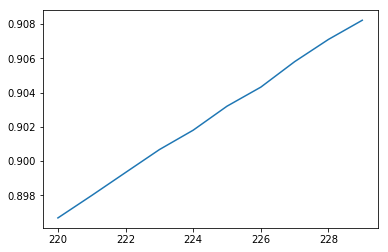

In [282]:
pd.Series(var_ratio).plot()

##### So 223 components express 90% of the variance 

In [283]:
#BUilding final pca of 223 components

final_pca=PCA(n_components=223)
reduced_X=final_pca.fit_transform(X)

In [285]:
reduced_X_df=pd.DataFrame(reduced_X)

In [286]:
reduced_X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
0,0.121591,-0.066736,-0.024976,-0.009834,-0.066199,0.001021,0.142962,0.027427,-0.083598,-0.048922,...,0.035048,-0.005314,-0.017126,0.020151,0.003404,0.004613,0.003534,0.007536,0.027511,-0.006571
1,0.127738,-0.135750,0.185658,-0.025311,-0.099003,0.037448,0.005655,-0.088646,-0.097157,0.032277,...,0.088510,0.033837,0.006329,-0.030541,0.021107,-0.031671,-0.027394,-0.003638,0.025007,0.011467
2,-0.013952,0.071219,0.015324,-0.047229,-0.046701,0.069047,0.046206,0.030365,-0.024187,-0.084135,...,0.032597,-0.006671,0.004198,0.015728,0.001193,0.024306,-0.052985,-0.011431,-0.067317,0.009647
3,-0.015950,0.053117,0.014675,-0.053434,-0.054109,0.031846,0.095954,-0.016204,-0.026354,-0.062357,...,0.013297,-0.038802,0.011590,0.014669,-0.050036,-0.014346,-0.033116,0.012815,-0.008634,-0.015152
4,0.063473,0.017706,0.035185,-0.142096,-0.055783,-0.005246,-0.010528,-0.056163,-0.024821,0.019062,...,0.055371,-0.076816,0.006830,0.026681,-0.075785,-0.094002,-0.032232,-0.043025,-0.037093,-0.033319


In [288]:
reduced_X_df.shape

(505, 223)

In [290]:
train_X,test_X,train_y,test_y=train_test_split(reduced_X_df,y,test_size=0.20,random_state=679)

In [291]:
from sklearn.linear_model import LogisticRegression

In [292]:
lr=LogisticRegression()

In [293]:
lr.fit(train_X,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [295]:
y_pred=lr.predict(test_X)

In [296]:
# calculate accuracy of class predictions

print(metrics.accuracy_score(test_y, y_pred))

0.8613861386138614


In [297]:
# confusion matrix
print(metrics.confusion_matrix(y_pred, test_y))


[[ 6  0]
 [14 81]]


In [300]:
pd.DataFrame({'Actual':test_y,'Predicted':y_pred}).head()

,Actual,Predicted
482,1,1
485,1,1
149,1,1
178,1,1
271,1,1


In [302]:
# predict (poorly calibrated) probabilities
    
y_pred_prob = lr.predict_proba(test_X)[:, 1]


In [303]:
# calculate AUC
print(metrics.roc_auc_score(test_y, y_pred_prob))


0.9845679012345678
